In [40]:
import sys
from pathlib import Path
project_root = Path("..").resolve()
sys.path.append(str(project_root))

from src.tremolo_vibrato import apply_effect as tremolo_vibrato_apply_effect
from src.chorus_flanger import apply_effect as chorus_flanger_apply_effect
from src.reverb import apply_effect as reverb_apply_effect
from src.pitch_formant_shift import apply_effect as pitch_shift_apply_effect
from scipy.io import wavfile
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.signal import stft
from IPython.display import Audio, display


In [41]:
path_voices = "../data/voices/"
#liste de voix possibles
list_voices = ["arctic_a0001.wav", "arctic_a0004.wav", "arctic_a0409.wav"]
sr, x = wavfile.read(path_voices + list_voices[2])
x = x.astype(np.float32) / 32768.0

Fonctions pour l'affichage des graphiques (Waveform + STFT)

In [42]:
def plot_waveform(sig, title):
    plt.figure(figsize=(10,3))
    plt.plot(sig)
    plt.title(title)
    plt.xlabel("Échantillon")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

def plot_stft(sig, fs, title, nperseg=1024, noverlap=768):
    f, t, Z = stft(sig, fs=fs, nperseg=nperseg, noverlap=noverlap,
                   window="hann", padded=True, boundary="zeros")
    S_db = 20*np.log10(np.maximum(np.abs(Z), 1e-10))
    plt.figure(figsize=(10,5))
    plt.pcolormesh(t, f, S_db, shading="gouraud")
    plt.title(title)
    plt.xlabel("Temps (s)")
    plt.ylabel("Fréquence (Hz)")
    plt.colorbar(label="Magnitude (dB)")
    plt.tight_layout()
    plt.show()

Inputs


▶ Input


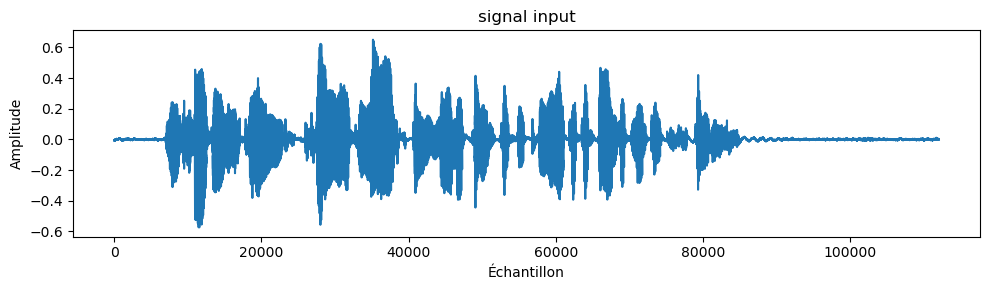

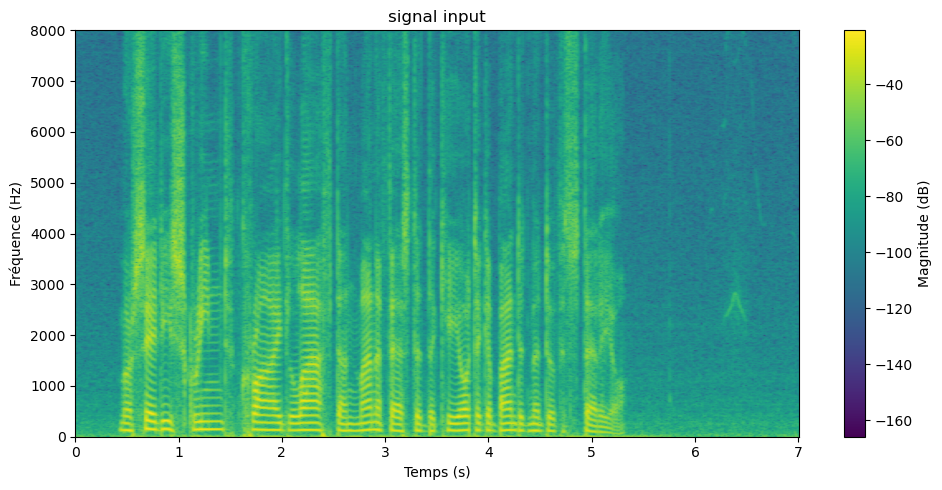

In [43]:
print("\n▶ Input")
display(Audio(x, rate=sr))
plot_waveform(x, "signal input")
plot_stft(x, sr, "signal input")

1) Applique  les effets Tremolo + Vibrato sur des voix



▶ Signal Tremolo + Vibrato


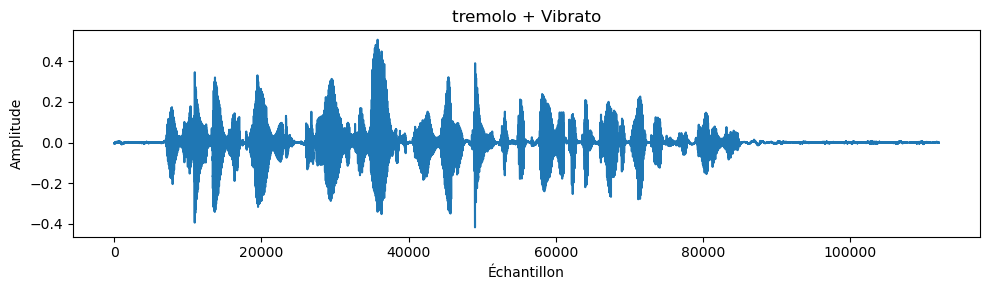

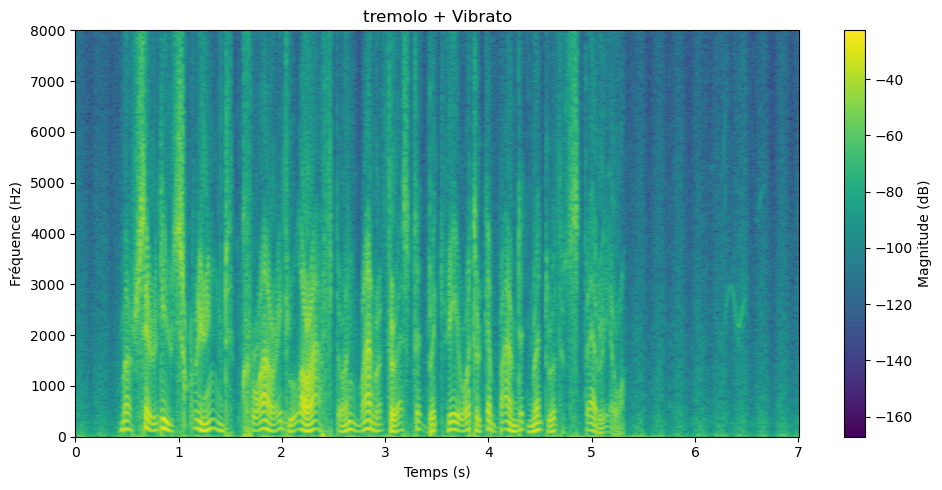

In [44]:
y = tremolo_vibrato_apply_effect(x, sr, N=len(x), tremolo_freq=5.0, tremolo_depth=0.8, vibrato_freq=6.0, vibrato_depth_ms=5.0)
print("\n▶ Signal Tremolo + Vibrato")
display(Audio(y, rate=sr))
plot_waveform(y, "tremolo + Vibrato")
plot_stft(y, sr, "tremolo + Vibrato")
wavfile.write('out_Tremolo_vibrato.wav', sr, (y * 32767).astype(np.int16))



2. Applique l'effet chorus sur des voix


▶ Signal Chorus


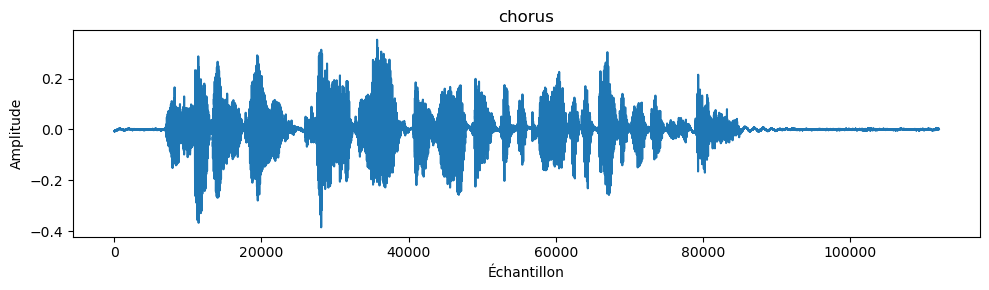

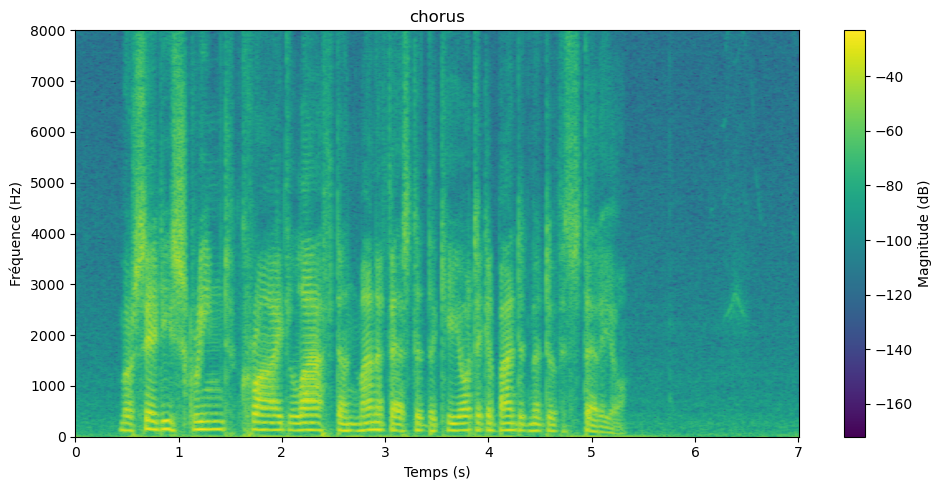

In [45]:
y = chorus_flanger_apply_effect(x, sr, 'chorus', num_voices=3, base_delay_ms=20, mod_depth_ms=7, mod_freq=1.2, feedback=0.5, mix=0.5)
print("\n▶ Signal Chorus")
display(Audio(y, rate=sr))
plot_waveform(y, "chorus")
plot_stft(y, sr, "chorus")
wavfile.write('out_Chorus_Flanger.wav', sr, (y * 32767).astype(np.int16))

3. Applique l'effet de reverberation par convolution sur des voix


▶ Signal Reverberation par convultion


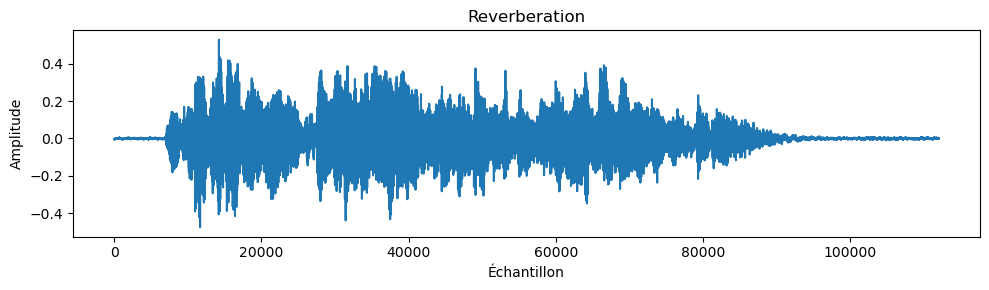

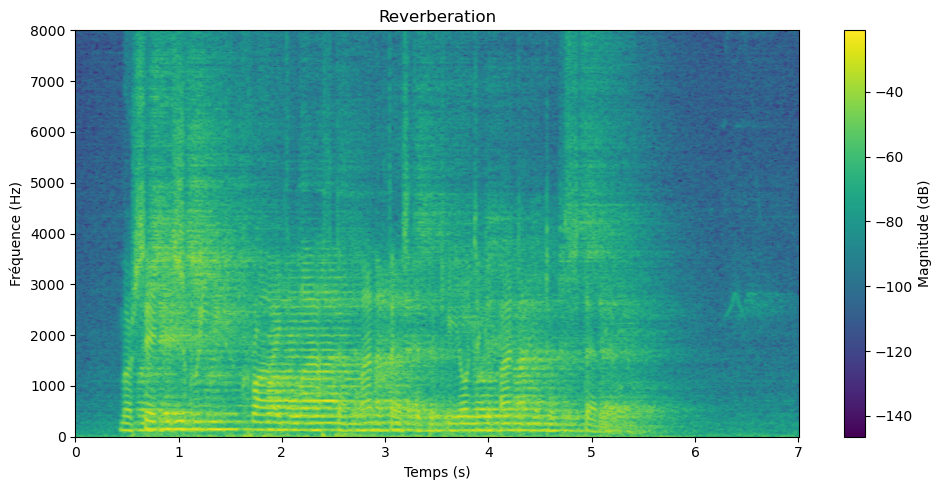

In [46]:
y = reverb_apply_effect(x, sr, rt60=1.5, pre_delay_ms=20.0, wet=0.5, early_reflections=8, diffusion=0.7)
print("\n▶ Signal Reverberation par convolution")
display(Audio(y, rate=sr))
plot_waveform(y, "Reverberation")
plot_stft(y, sr, "Reverberation")
wavfile.write('out_reverb.wav', sr, (y * 32767).astype(np.int16))

4. Applique l'effet de pitch formant shift sur des voix


▶ Signal pitch formant shift


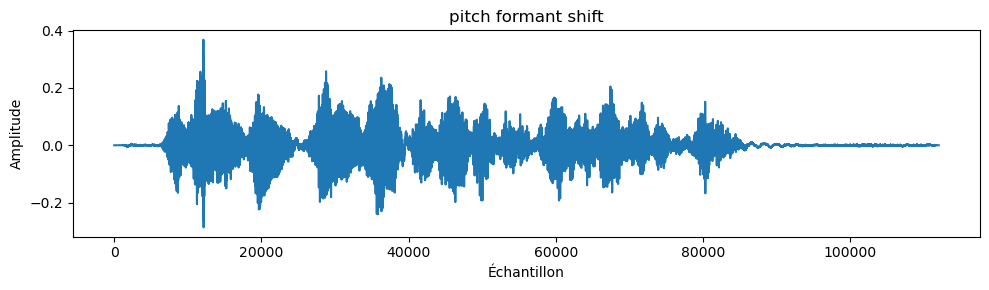

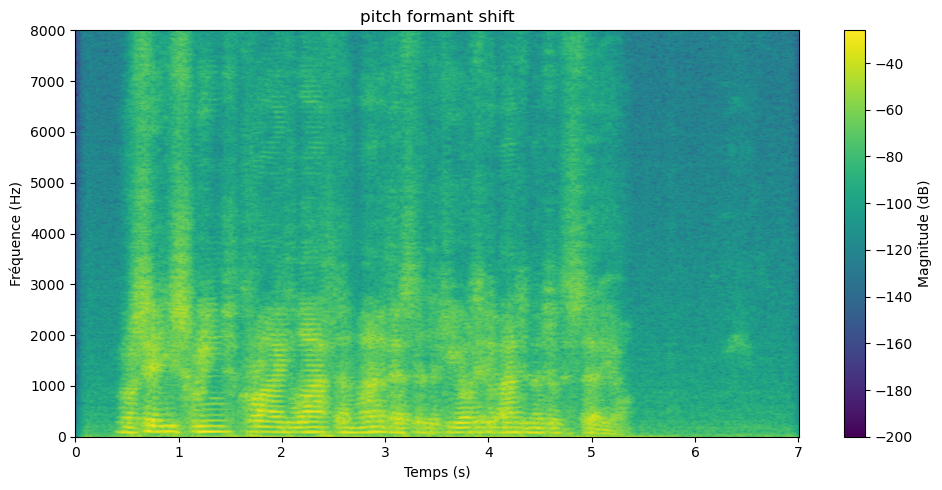

In [47]:
y = pitch_shift_apply_effect(x, sr, pitch_semitones=6.0, formant_semitones=0.0, preserve_formants=False, n_fft=2048, hop_length=512)
print("\n▶ Signal pitch formant shift")
display(Audio(y, rate=sr))
plot_waveform(y, "pitch formant shift")
plot_stft(y, sr, "pitch formant shift")
wavfile.write('out_pitch_shift.wav', sr, (y * 32767).astype(np.int16))